1) Load and Explore Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load and inspect dataset 
data = pd.read_csv("train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#print summary statistics 
print(data.describe())
print('\n')

#print dataframe information
print(data.info())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
L

In [4]:
#check target incidence
data.Loan_Status.value_counts(normalize=True).round(3)

Y    0.687
N    0.313
Name: Loan_Status, dtype: float64

2) Handle Missing Values

In [5]:
#inspect missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

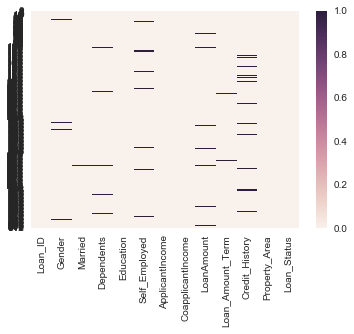

In [6]:
#use a heatmap to visualize missing values
sns.heatmap(data.isnull())
plt.show()

In [7]:
# Impute missing values with mean imputation for numeric data
data.fillna(data.mean(skipna=True), inplace=True)

# Count the number of NaNs in dataset to verify
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Iterate over each column of train
for col in data.columns: 
    # Check if column is of object type
    if data[col].dtype == 'object': 
        # Impute with the most frequent value i.e. mode 
        data = data.fillna(data[col].value_counts().index[0])

# Count the number of NaNs in the dataset to verify 
print(data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [9]:
# Define a function for imputing missing values 
def impute_numeric_data(df): 
    df.fillna(df.mean(skipna=True), inplace=True)
    return
    
def impute_nonnumeric_data(df): 
    for col in df.columns: 
        if df[col].dtype == 'object':
            df = df.fillna(df[col].value_counts().index[0])   
    return 

In [14]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


3) Preprocessing the data 

After successfully handling the missing values, there is some minor but essential data preprocessing needed before building our machine learning model. There are 3 main tasks: 
1. Split data into train and test sets
2. Convert non-numeric data into numeric 
3. Scale feature values to a uniform range 

First, we need to split our data into train and test set. This is done before scaling so that no information from the test data is used to scale the training data or direct the training process of a ML model. We should also drop Loan ID which is not important for predicting loans. 

In [18]:
# Segregate features and labels into separate variables, drop Loan ID (index 0) 
X = data.iloc[:, 1:12].values
y = data.iloc[:, 12].values

In [46]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) 
#how come 42 messes up the data?? 

In [47]:
X_train

array([['Male', 'Yes', '0', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'No', '1', ..., 360.0, 0.8421985815602837, 'Semiurban'],
       ['Male', 'Yes', '0', ..., 360.0, 0.0, 'Rural'],
       ..., 
       ['Male', 'Yes', '3+', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'Yes', '0', ..., 360.0, 1.0, 'Semiurban']], dtype=object)

Then, convert all non-numeric data into numeric ones as required by many ML models, by using label encoding.

In [36]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

def encode_data(df):
    # Instantiate LabelEncoder
    le = LabelEncoder()
    
    # Iterate over all values of each column if column is of non-numeric type and transform using LabelEncoder
    for col in df.columns: 
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    
    return df.head()

In [50]:
# Encode the features (x variables)
le_x = LabelEncoder()

for i in range(0, 5):
    X_train[:, i] = le_x.fit_transform(X_train[:, i])

X_train[:, 10] = le_x.fit_transform(X_train[:, 10])

In [52]:
for i in range(0, 5):
    X_test[:, i] = le_x.fit_transform(X_test[:, i])

X_test[:, 10] = le_x.fit_transform(X_test[:, 10])

In [53]:
# Encode the label (y variable)
le_y = LabelEncoder()

y_train = le_y.fit_transform(y_train)
y_test = le_y.fit_transform(y_test)

Final preprocessing step left is to scale all values to the range of 0 - 1 to avoid model bias.

In [54]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate Standard Scaler and use it to rescale X_train and test 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


4) Train the model

Essentially, predicting loan success is a binary classification task. 

In [84]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameters
lr = LogisticRegression()

# Fit lr to the train set
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

5) Make predictions and evaluate performance

Evaluate model with respect to classification accuracy. Also look at the model's confusion matrix. 

In [85]:
# Import metrics from sklearn
from sklearn import metrics

# Use lr to predict instances from the test set and store it 
y_pred = lr.predict(X_test)

# Get accuracy score of lr model and print it 
print('The accuracy of Logistic Regression model is: ', lr.score(X_test, y_test))

# Print the confusion matrix of the lr model
metrics.confusion_matrix(y_test, y_pred)

The accuracy of Logistic Regression model is:  0.731707317073


array([[15, 18],
       [15, 75]])

Try experimenting with other models

In [59]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(scaled_X_train, y_train)

GaussianNB(priors=None)

In [61]:
y_pred = nb.predict(scaled_X_test)
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Naive Bayes is:  0.756097560976


In [62]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
tree.fit(scaled_X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [64]:
y_pred = tree.predict(scaled_X_test)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Decision Tree is:  0.674796747967


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rt.fit(X_train, y_train)
y_pred = rt.predict(X_test)
print('The accuracy of Random Forest is: ', metrics.accuracy_score(y_pred, y_test))

In [65]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 42)
svm.fit(scaled_X_train, y_train)
y_pred = svm.predict(scaled_X_test)
print('The accuracy of SVM is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of SVM is:  0.829268292683


EXTRA 1: use PCA for dimension reduction if correlation between features are strong (> 0.3) otherwise not useful 
check with a correlation matrix 

In [76]:
# Apple PCA 
from sklearn.decomposition import PCA
pca = PCA()
exp_variance = pca.fit(scaled_X_train).explained_variance_ratio_
cum_sum_variance = np.cumsum(exp_variance)

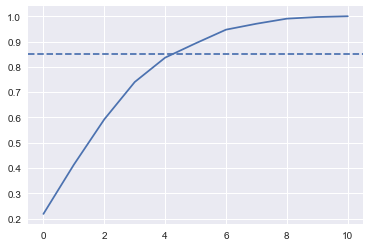

In [77]:
fig, ax = plt.subplots()
ax.plot(range(pca.n_components_), cum_sum_variance)
ax.axhline(y=0.85, linestyle='--')
plt.show()

In [83]:
pca = PCA(n_components=4)
X_train = pca.fit_transform(scaled_X_train)
X_test = pca.fit_transform(scaled_X_test)

In [78]:
most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
initial_feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [ ]:
most_important_names = [initial_feature_names[most_important[i]] for i in range(pca.n_components_)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(pca.n_components_)}
dic

EXTRA 2: can use Grid Search of the model parameters to improve the model performance. 
Every model has different hyperparameters: 
LR - tol, max_iter 
etc... 
1) Define the grid of hyperparameter values and convert them into a single dictionary format
2) Supply the full X (scaled version) and y instead of train/test sets 
3) Indicate cross-validation of x folds 

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))